<a href="https://colab.research.google.com/github/bugeki/DL/blob/main/DL_Assignment_3_(Time_Series_with_RNN_Product_Amount_Forecast_by_Time)_Student.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Assignment-3 (RNN)<br><br>Product Amount Forecast by Time<br><h1>

# Dataset Info

Info about this data set: https://fred.stlouisfed.org/series/IPN31152N


Units:  Index 2012=100, Not Seasonally Adjusted

Frequency:  Monthly

The industrial production (IP) index measures the real output of all relevant establishments located in the United States, regardless of their ownership, but not those located in U.S. territories.

NAICS = 31152

Source Code: IP.N31152.N

Suggested Citation:
Board of Governors of the Federal Reserve System (US), Industrial Production: Nondurable Goods: Ice cream and frozen dessert [IPN31152N], retrieved from FRED, Federal Reserve Bank of St. Louis; https://fred.stlouisfed.org/series/IPN31152N, November 16, 2019.

# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10,6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Indest Data

In [6]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DL/RNN/Ass 3/Frozen_Dessert_Production.csv',index_col='DATE', parse_dates = True)

# Exploratory Data Analysis and Visualization

1. Implement basic steps to see how is your data looks like
2. Change the column name as "Production"
2. Plot your data and see its seasonalty

In [7]:
df.head()

,IPN31152N
DATE,
1972-01-01,59.962
1972-02-01,67.061
1972-03-01,74.235
1972-04-01,78.112
1972-05-01,84.764


In [85]:
df.tail(5)

,Production
DATE,
2019-05-01,114.561
2019-06-01,124.960
2019-07-01,110.263
2019-08-01,102.609
2019-09-01,101.587


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 573 entries, 1972-01-01 to 2019-09-01
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   IPN31152N  573 non-null    float64
dtypes: float64(1)
memory usage: 9.0 KB


In [9]:
df.columns = ['Production']

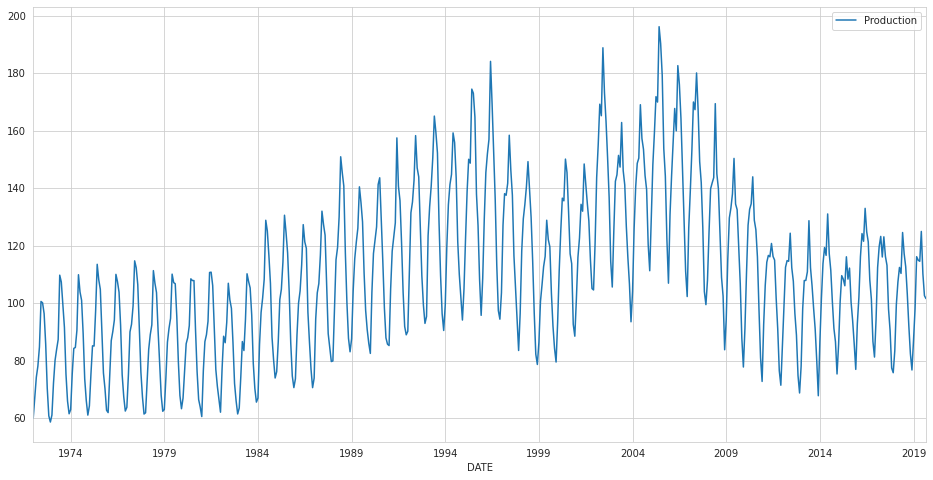

In [10]:
df.plot(figsize=(16,8))

# Preprocessing of Data

## Train Test Split

In [11]:
len(df)

573

In [12]:
test_size = 24

In [13]:
test_ind = len(df)- test_size
test_ind

549

In [14]:
train = df.iloc[:test_ind]
test = df.iloc[test_ind:]

In [15]:
train

,Production
DATE,
1972-01-01,59.962
1972-02-01,67.061
1972-03-01,74.235
1972-04-01,78.112
1972-05-01,84.764
...,...
2017-05-01,116.064
2017-06-01,123.087
2017-07-01,116.264


In [16]:
test

,Production
DATE,
2017-10-01,90.473
2017-11-01,77.438
2017-12-01,75.812
2018-01-01,83.434
2018-02-01,99.490
2018-03-01,107.315
2018-04-01,112.431
2018-05-01,110.354
2018-06-01,124.584


## Scaling

In [17]:
from sklearn.preprocessing import MinMaxScaler

In [18]:
scaler = MinMaxScaler()

In [19]:
train_scaled = scaler.fit_transform(train)
test_scaled = scaler.transform(test)

## Time Series Generator

In [20]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [21]:
length = 12
batch_size = 1
generator = TimeseriesGenerator(train_scaled, train_scaled, length = length, batch_size = batch_size)

In [22]:
len(generator)

537

In [23]:
generator[0]

(array([[[0.00947104],
         [0.06108982],
         [0.11326273],
         [0.14145625],
         [0.18982663],
         [0.30495972],
         [0.30154406],
         [0.27416065],
         [0.19736841],
         [0.08532665],
         [0.01561588],
         [0.        ]]]), array([[0.01774221]]))

In [24]:
X, y = generator[0]

In [25]:
print(f'Given the Array: \n{X.flatten()}')
print(f'Predict this y: \n {y}')

Given the Array: 
[0.00947104 0.06108982 0.11326273 0.14145625 0.18982663 0.30495972
 0.30154406 0.27416065 0.19736841 0.08532665 0.01561588 0.        ]
Predict this y: 
 [[0.01774221]]


# Modelling & Model Performance

## with "tanh" activation function

In [26]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

In [27]:
train_scaled.shape

(549, 1)

In [28]:
n_features = train_scaled.shape[1]

In [29]:
model = Sequential()
model.add(LSTM(100, activation = 'tanh', return_sequences=True, input_shape = (length, n_features)))
model.add(LSTM(50, activation = 'tanh'))
model.add(Dense(1))
model.compile(optimizer = 'adam', loss = 'mse')

In [30]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 12, 100)           40800     
                                                                 
 lstm_1 (LSTM)               (None, 50)                30200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 71,051
Trainable params: 71,051
Non-trainable params: 0
_________________________________________________________________


In [31]:
# params = 4 * ((size_of_input + 1) * size_of_output + size_of_output^2)
4 * ((1+1)*100+(100**2))

40800

In [32]:
4 * ((100+1)*50+(50**2))

30200

In [33]:
from tensorflow.keras.callbacks import EarlyStopping

In [34]:
early_stop = EarlyStopping(monitor = 'val_loss', patience = 5,restore_best_weights = True)

In [35]:
validation_generator = TimeseriesGenerator(test_scaled, test_scaled, length = length, batch_size = batch_size)

In [36]:
len(validation_generator)

12

In [37]:
model.fit(x = generator,
          epochs = 120,
          validation_data = validation_generator,
          callbacks = [early_stop])

Epoch 1/120
537/537 [==============================] - 12s 15ms/step - loss: 0.0197 - val_loss: 0.0044
Epoch 2/120
537/537 [==============================] - 7s 13ms/step - loss: 0.0055 - val_loss: 0.0030
Epoch 3/120
537/537 [==============================] - 6s 12ms/step - loss: 0.0045 - val_loss: 0.0024
Epoch 4/120
537/537 [==============================] - 6s 12ms/step - loss: 0.0041 - val_loss: 0.0040
Epoch 5/120
537/537 [==============================] - 7s 12ms/step - loss: 0.0042 - val_loss: 0.0022
Epoch 6/120
537/537 [==============================] - 6s 12ms/step - loss: 0.0036 - val_loss: 0.0025
Epoch 7/120
537/537 [==============================] - 7s 13ms/step - loss: 0.0036 - val_loss: 0.0020
Epoch 8/120
537/537 [==============================] - 6s 12ms/step - loss: 0.0034 - val_loss: 0.0019
Epoch 9/120
537/537 [==============================] - 6s 12ms/step - loss: 0.0030 - val_loss: 0.0019
Epoch 10/120
537/537 [==============================] - 8s 16ms/step - loss: 0.00

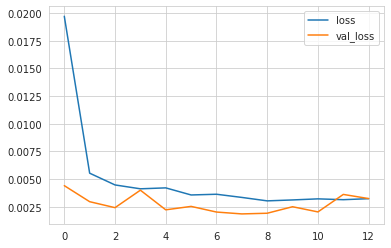

In [38]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

### Evaluation on Test Data

In [39]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [40]:
def eval_metrics(actual, pred):
    rmse = np.sqrt(mean_squared_error(actual, pred))
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    score = r2_score(actual, pred)
    return print("r2_score:", score, "\nmae:", mae, "\nmse:",mse, "\nrmse:",rmse)

In [41]:
predictions_scaled = []

first_eval_batch = train_scaled[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(length):
    
    # get prediction 1 time stamp ahead
    current_pred = model.predict(current_batch)
    
    # store prediction
    predictions_scaled.append(current_pred[0]) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:, 1:, :], [current_pred], axis=1)

In [42]:
predictions_scaled

[array([0.25830123], dtype=float32),
 array([0.24588077], dtype=float32),
 array([0.27270976], dtype=float32),
 array([0.3230157], dtype=float32),
 array([0.37682772], dtype=float32),
 array([0.42128932], dtype=float32),
 array([0.45031065], dtype=float32),
 array([0.4584937], dtype=float32),
 array([0.44510013], dtype=float32),
 array([0.40736377], dtype=float32),
 array([0.3572539], dtype=float32),
 array([0.30901712], dtype=float32)]

In [43]:
eval_metrics(test_scaled[:length], predictions_scaled)

r2_score: 0.4701853828325204 
mae: 0.06836752325780888 
mse: 0.006607126718281706 
rmse: 0.08128423413111369


### Inverse Transformation and Comparing

In [44]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [45]:
def eval_metrics(actual, pred):
    rmse = np.sqrt(mean_squared_error(actual, pred))
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    score = r2_score(actual, pred)
    return print("r2_score:", score, "\nmae:", mae, "\nmse:",mse, "\nrmse:",rmse)

In [46]:
predictions_scaled = []

first_eval_batch = train_scaled[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(length):
    
    # get prediction 1 time stamp ahead
    current_pred = model.predict(current_batch)
    
    # store prediction
    predictions_scaled.append(current_pred[0]) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:, 1:, :], [current_pred], axis=1)

In [47]:
predictions_scaled

[array([0.25830123], dtype=float32),
 array([0.24588077], dtype=float32),
 array([0.27270976], dtype=float32),
 array([0.3230157], dtype=float32),
 array([0.37682772], dtype=float32),
 array([0.42128932], dtype=float32),
 array([0.45031065], dtype=float32),
 array([0.4584937], dtype=float32),
 array([0.44510013], dtype=float32),
 array([0.40736377], dtype=float32),
 array([0.3572539], dtype=float32),
 array([0.30901712], dtype=float32)]

In [48]:
eval_metrics(test_scaled[:length], predictions_scaled)

r2_score: 0.4701853828325204 
mae: 0.06836752325780888 
mse: 0.006607126718281706 
rmse: 0.08128423413111369


In [49]:
predictions = scaler.inverse_transform(predictions_scaled)

In [50]:
compare = test[:12]

In [51]:
compare['Predictions'] = predictions

In [52]:
compare

,Production,Predictions
DATE,,
2017-10-01,90.473,94.180
2017-11-01,77.438,92.472
2017-12-01,75.812,96.161
2018-01-01,83.434,103.079
2018-02-01,99.490,110.479
2018-03-01,107.315,116.593
2018-04-01,112.431,120.584
2018-05-01,110.354,121.709
2018-06-01,124.584,119.867


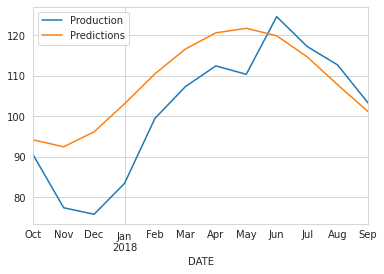

In [53]:
compare.plot()

In [55]:
eval_metrics(compare.Production, compare.Predictions)

r2_score: 0.47018538283252087 
mae: 9.401484756522004 
mse: 124.94124653595703 
rmse: 11.17771204388255


## with "relu" activation function

In [56]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

In [57]:
train_scaled.shape

(549, 1)

In [58]:
n_features = train_scaled.shape[1]

In [59]:
model = Sequential()
model.add(LSTM(100, activation = 'tanh', return_sequences=True, input_shape = (length, n_features)))
model.add(LSTM(50, activation = 'tanh'))
model.add(Dense(1))
model.compile(optimizer = 'adam', loss = 'mse')

In [60]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 12, 100)           40800     
                                                                 
 lstm_3 (LSTM)               (None, 50)                30200     
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 71,051
Trainable params: 71,051
Non-trainable params: 0
_________________________________________________________________


In [61]:
# params = 4 * ((size_of_input + 1) * size_of_output + size_of_output^2)
4 * ((1+1)*100+(100**2))

40800

In [62]:
4 * ((100+1)*50+(50**2))

30200

In [63]:
from tensorflow.keras.callbacks import EarlyStopping

In [64]:
early_stop = EarlyStopping(monitor = 'val_loss', patience = 5,restore_best_weights = True)

In [65]:
validation_generator = TimeseriesGenerator(test_scaled, test_scaled, length = length, batch_size = batch_size)

In [66]:
len(validation_generator)

12

In [67]:
model.fit(x = generator,
          epochs = 120,
          validation_data = validation_generator,
          callbacks = [early_stop])

Epoch 1/120
537/537 [==============================] - 12s 14ms/step - loss: 0.0238 - val_loss: 0.0053
Epoch 2/120
537/537 [==============================] - 7s 12ms/step - loss: 0.0049 - val_loss: 0.0025
Epoch 3/120
537/537 [==============================] - 7s 12ms/step - loss: 0.0048 - val_loss: 0.0033
Epoch 4/120
537/537 [==============================] - 7s 12ms/step - loss: 0.0043 - val_loss: 0.0029
Epoch 5/120
537/537 [==============================] - 7s 13ms/step - loss: 0.0043 - val_loss: 0.0031
Epoch 6/120
537/537 [==============================] - 7s 13ms/step - loss: 0.0037 - val_loss: 0.0019
Epoch 7/120
537/537 [==============================] - 7s 13ms/step - loss: 0.0038 - val_loss: 0.0017
Epoch 8/120
537/537 [==============================] - 6s 12ms/step - loss: 0.0035 - val_loss: 0.0031
Epoch 9/120
537/537 [==============================] - 6s 12ms/step - loss: 0.0035 - val_loss: 0.0045
Epoch 10/120
537/537 [==============================] - 6s 12ms/step - loss: 0.00

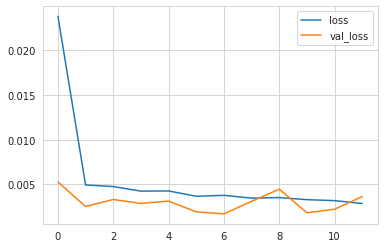

In [68]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

### Evaluation on Test Data

In [69]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [70]:
def eval_metrics(actual, pred):
    rmse = np.sqrt(mean_squared_error(actual, pred))
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    score = r2_score(actual, pred)
    return print("r2_score:", score, "\nmae:", mae, "\nmse:",mse, "\nrmse:",rmse)

In [71]:
predictions_scaled = []

first_eval_batch = train_scaled[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(length):
    
    # get prediction 1 time stamp ahead
    current_pred = model.predict(current_batch)
    
    # store prediction
    predictions_scaled.append(current_pred[0]) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:, 1:, :], [current_pred], axis=1)

In [72]:
predictions_scaled

[array([0.23798998], dtype=float32),
 array([0.2227557], dtype=float32),
 array([0.2546478], dtype=float32),
 array([0.31175733], dtype=float32),
 array([0.36811486], dtype=float32),
 array([0.4099371], dtype=float32),
 array([0.43285254], dtype=float32),
 array([0.43313935], dtype=float32),
 array([0.4114811], dtype=float32),
 array([0.36381224], dtype=float32),
 array([0.30468953], dtype=float32),
 array([0.2514612], dtype=float32)]

In [73]:
eval_metrics(test_scaled[:length], predictions_scaled)

r2_score: 0.48874281098855565 
mae: 0.07267224520929357 
mse: 0.006375703734809027 
rmse: 0.07984800395006143


### Inverse Transformation and Comparing

In [74]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [75]:
def eval_metrics(actual, pred):
    rmse = np.sqrt(mean_squared_error(actual, pred))
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    score = r2_score(actual, pred)
    return print("r2_score:", score, "\nmae:", mae, "\nmse:",mse, "\nrmse:",rmse)

In [76]:
predictions_scaled = []

first_eval_batch = train_scaled[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(length):
    
    # get prediction 1 time stamp ahead
    current_pred = model.predict(current_batch)
    
    # store prediction
    predictions_scaled.append(current_pred[0]) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:, 1:, :], [current_pred], axis=1)

In [77]:
predictions_scaled

[array([0.23798998], dtype=float32),
 array([0.2227557], dtype=float32),
 array([0.2546478], dtype=float32),
 array([0.31175733], dtype=float32),
 array([0.36811486], dtype=float32),
 array([0.4099371], dtype=float32),
 array([0.43285254], dtype=float32),
 array([0.43313935], dtype=float32),
 array([0.4114811], dtype=float32),
 array([0.36381224], dtype=float32),
 array([0.30468953], dtype=float32),
 array([0.2514612], dtype=float32)]

In [78]:
eval_metrics(test_scaled[:length], predictions_scaled)

r2_score: 0.48874281098855565 
mae: 0.07267224520929357 
mse: 0.006375703734809027 
rmse: 0.07984800395006143


In [79]:
predictions = scaler.inverse_transform(predictions_scaled)

In [80]:
compare = test[:12]

In [81]:
compare['Predictions'] = predictions

In [82]:
compare

,Production,Predictions
DATE,,
2017-10-01,90.473,91.387
2017-11-01,77.438,89.292
2017-12-01,75.812,93.677
2018-01-01,83.434,101.531
2018-02-01,99.490,109.281
2018-03-01,107.315,115.032
2018-04-01,112.431,118.183
2018-05-01,110.354,118.222
2018-06-01,124.584,115.244


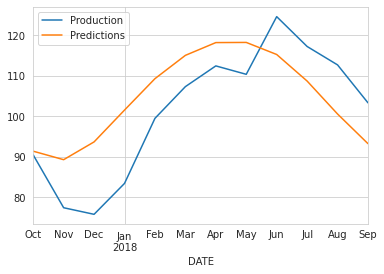

In [83]:
compare.plot()

In [84]:
eval_metrics(compare.Production, compare.Predictions)

r2_score: 0.488742810988556 
mae: 9.993443860486272 
mse: 120.56502109560915 
rmse: 10.980210430388352


# Retrain and Forecasting

Select activation function providing a better score, create your final model with full data, forecast for the next 12 months, and plot this forecast.

In [86]:
full_scaler = MinMaxScaler()
scaled_full_data = full_scaler.fit_transform(df)

In [87]:
generator = TimeseriesGenerator(scaled_full_data, scaled_full_data, length = length, batch_size = batch_size)

In [88]:
len(df)

573

In [89]:
len(generator)

561

In [90]:
model = Sequential()
model.add(LSTM(100, activation = 'relu', return_sequences=True, input_shape = (length, n_features)))
model.add(LSTM(50, activation = 'relu'))
model.add(Dense(1))
model.compile(optimizer = 'adam', loss = 'mse')

model.fit(x = generator, epochs=15)

Epoch 1/15
561/561 [==============================] - 10s 13ms/step - loss: 0.0244
Epoch 2/15
561/561 [==============================] - 6s 10ms/step - loss: 0.0097
Epoch 3/15
561/561 [==============================] - 11s 19ms/step - loss: 0.0068
Epoch 4/15
561/561 [==============================] - 7s 13ms/step - loss: 0.0067
Epoch 5/15
561/561 [==============================] - 8s 15ms/step - loss: 0.0061
Epoch 6/15
561/561 [==============================] - 6s 11ms/step - loss: 0.0050
Epoch 7/15
561/561 [==============================] - 6s 11ms/step - loss: 0.0053
Epoch 8/15
561/561 [==============================] - 6s 10ms/step - loss: 0.0041
Epoch 9/15
561/561 [==============================] - 6s 10ms/step - loss: 0.0037
Epoch 10/15
561/561 [==============================] - 6s 10ms/step - loss: 0.0035
Epoch 11/15
561/561 [==============================] - 6s 10ms/step - loss: 0.0034
Epoch 12/15
561/561 [==============================] - 6s 10ms/step - loss: 0.0032
Epoch 13/15

In [91]:
scaled_full_data.shape

(573, 1)

In [92]:
scaled_full_data[-length:].shape

(12, 1)

In [93]:
forecast = []

first_eval_batch = scaled_full_data[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(length):
    
    # get prediction 1 time stamp ahead ([0] is for grabbing just the number instead of [array])
    current_pred = model.predict(current_batch)
    
    # store prediction
    forecast.append(current_pred[0]) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:, 1:, :], [current_pred], axis = 1)

In [94]:
forecast = scaler.inverse_transform(forecast)

In [95]:
forecast

array([[ 94.74647203],
       [ 88.86304791],
       [ 87.04415348],
       [ 95.33628981],
       [107.2930789 ],
       [116.83711903],
       [121.85823793],
       [126.87554957],
       [129.20956326],
       [125.98220842],
       [121.35815507],
       [115.38241823]])

In [96]:
df

,Production
DATE,
1972-01-01,59.962
1972-02-01,67.061
1972-03-01,74.235
1972-04-01,78.112
1972-05-01,84.764
...,...
2019-05-01,114.561
2019-06-01,124.960
2019-07-01,110.263


In [97]:
forecast_index = pd.date_range(start = '2019-10-01', periods = length, freq = 'MS')

In [98]:
forecast_index

DatetimeIndex(['2019-10-01', '2019-11-01', '2019-12-01', '2020-01-01',
               '2020-02-01', '2020-03-01', '2020-04-01', '2020-05-01',
               '2020-06-01', '2020-07-01', '2020-08-01', '2020-09-01'],
              dtype='datetime64[ns]', freq='MS')

In [99]:
forecast_df = pd.DataFrame(data = forecast, index = forecast_index, columns = ['Forecast'])

In [100]:
forecast_df

,Forecast
2019-10-01,94.746
2019-11-01,88.863
2019-12-01,87.044
2020-01-01,95.336
2020-02-01,107.293
2020-03-01,116.837
2020-04-01,121.858
2020-05-01,126.876
2020-06-01,129.210
2020-07-01,125.982


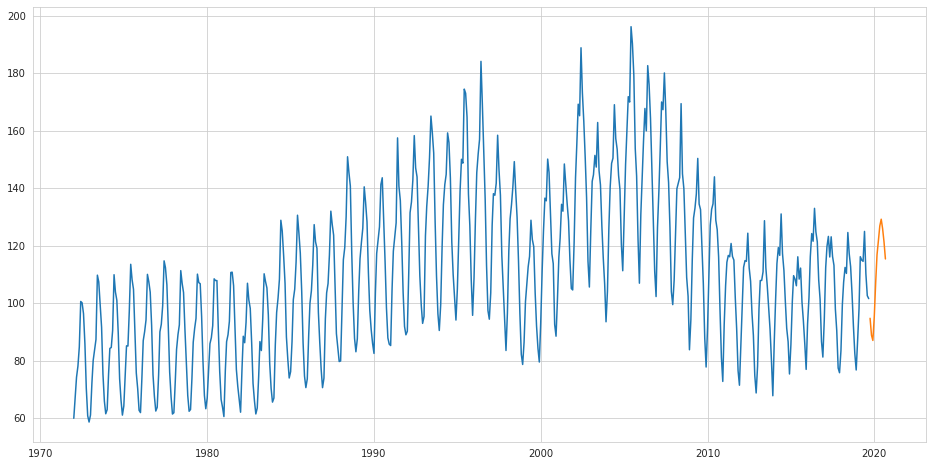

In [101]:
plt.figure(figsize = (16, 8))
plt.plot(df.index, df['Production'])
plt.plot(forecast_df.index, forecast_df['Forecast'])

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___